# **Sentiment Analysis** of the **Restaurant Reviews** from **YELP** Dataset

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
import re

In [2]:
df_final = pd.read_csv('C:/yelp/df_final_yelp_review_nltk_preprocessed.csv')
df_final.shape

(1798366, 4)

In [3]:
df_final.head()

,name,city,cleaned_reviews,sentiment
0,St Honore Pastries,Philadelphia,"['thi', 'nice', 'littl', 'chine', 'bakeri', 'h...",1.0
1,St Honore Pastries,Philadelphia,"['thi', 'bakeri', 'i', 'usual', 'go', 'chinato...",1.0
2,St Honore Pastries,Philadelphia,"['a', 'delight', 'find', 'chinatown', 'veri', ...",1.0
3,St Honore Pastries,Philadelphia,"['i', 'order', 'graduat', 'cake', 'niec', 'cam...",1.0
4,St Honore Pastries,Philadelphia,"['hkstyle', 'milk', 'tea', 'four', 'star', 'no...",1.0


In [4]:
df_final = df_final.dropna()

In [5]:
df_final['cleaned_reviews'].isnull().sum()

0

In [6]:
X = df_final['cleaned_reviews'] 
y = df_final['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [7]:
X_train.head()

962509     ['i', 'thoroughli', 'impress', 'littl', 'town'...
377218     ['thi', 'must', 'nola', 'i', 'highli', 'recomm...
519477     ['amaz', 'food', 'amaz', 'servic', 'the', 'por...
1228677    ['excel', 'littl', 'restaur', 'bar', 'garden',...
1631185    ['mmmmm', 'datz', 'breakfast', 'awesom', 'lunc...
Name: cleaned_reviews, dtype: object

In [8]:
X_train.shape

(1438692,)

In [9]:
X_train.isnull().any()

False

In [10]:
y_train.head()

962509     1.0
377218     1.0
519477     1.0
1228677    1.0
1631185    1.0
Name: sentiment, dtype: float64

In [11]:
y_train.shape

(1438692,)

In [12]:
print(X_test.shape)
print(y_test.shape)

(359674,)
(359674,)


#### Count Vectorizer

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=17000)
X_train_counts = vectorizer.fit_transform(X_train)

NameError: name 'X_train' is not defined

In [1]:
print(X_train[0])

NameError: name 'X_train' is not defined

In [57]:
print(X_train_counts)

  (0, 15109)	1
  (0, 7345)	1
  (0, 8566)	1
  (0, 15380)	1
  (0, 5238)	2
  (0, 11794)	1
  (0, 14349)	2
  (0, 7666)	1
  (0, 12269)	1
  (0, 11482)	1
  (0, 3392)	1
  (0, 14194)	1
  (0, 2883)	1
  (0, 15192)	1
  (0, 6226)	1
  (0, 6232)	1
  (0, 15087)	1
  (0, 16739)	1
  (0, 6917)	1
  (0, 12209)	1
  (0, 567)	1
  (0, 16331)	1
  (0, 2828)	1
  (0, 6032)	1
  (1, 7666)	2
  :	:
  (1438691, 6070)	1
  (1438691, 8888)	1
  (1438691, 946)	4
  (1438691, 7265)	1
  (1438691, 2159)	1
  (1438691, 4650)	2
  (1438691, 7298)	1
  (1438691, 4787)	1
  (1438691, 8508)	1
  (1438691, 4594)	1
  (1438691, 5859)	2
  (1438691, 8329)	1
  (1438691, 14928)	1
  (1438691, 4997)	1
  (1438691, 8057)	1
  (1438691, 5337)	1
  (1438691, 7119)	1
  (1438691, 8677)	1
  (1438691, 10131)	1
  (1438691, 5293)	2
  (1438691, 531)	1
  (1438691, 7651)	1
  (1438691, 6535)	1
  (1438691, 8717)	2
  (1438691, 16191)	1


In [58]:
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

['aa' 'aaa' 'aah' ... 'zuppa' 'zuzu' 'zydeco']


In [59]:
print(vectorizer.vocabulary_)

{'thoroughli': 15109, 'impress': 7345, 'littl': 8566, 'town': 15380, 'feel': 5238, 'produc': 11794, 'store': 14349, 'it': 7666, 'refresh': 12269, 'polit': 11482, 'courteou': 3392, 'staff': 14194, 'clearli': 2883, 'time': 15192, 'gone': 6226, 'good': 6232, 'thing': 15087, 'would': 16739, 'highli': 6917, 'recommend': 12209, 'anyon': 567, 'want': 16331, 'citi': 2828, 'gener': 6032, 'thi': 15072, 'must': 9839, 'nola': 10135, 'place': 11355, 'clean': 2874, 'servic': 13272, 'great': 6373, 'got': 6276, 'oyster': 10738, 'po': 11444, 'boy': 1694, 'melt': 9251, 'harmoni': 6697, 'mouth': 9739, 'afford': 177, 'well': 16438, 'the': 15032, 'ambienc': 429, 'food': 5569, 'amaz': 413, 'portion': 11565, 'huge': 7172, 'wont': 16686, 'go': 6191, 'hungri': 7203, 'look': 8645, 'poke': 11472, 'excel': 4991, 'restaur': 12441, 'bar': 1021, 'garden': 5960, 'district': 4258, 'mmmmm': 9557, 'datz': 3752, 'breakfast': 1745, 'awesom': 874, 'lunch': 8756, 'yet': 16862, 'wander': 16326, 'dinner': 4130, 'im': 7305, 'e

In [60]:
#df = pd.DataFrame(X_train_counts.toarray(), columns = feature_names)
#print(df)

In [61]:
# Calculate term frequencies
#term_frequencies = np.sum(X_train_counts.toarray(), axis=0)

# Sort indices by term frequencies
#sorted_indices = np.argsort(term_frequencies)[::-1]

# Get top 100 features
#top_features = [(feature_names[i], term_frequencies[i]) for i in sorted_indices[:1000]]

#print(top_features)

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_counts, y_train)
# Transform the test data into a matrix of token counts
X_test_counts = vectorizer.transform(X_test)
# Make predictions on the test data
predictions = lr.predict(X_test_counts)
print(confusion_matrix(y_test, predictions))

[[ 64724   8947]
 [  5262 280741]]


In [63]:
print(classification_report(y_test, predictions, digits=4))

              precision    recall  f1-score   support

         0.0     0.9248    0.8786    0.9011     73671
         1.0     0.9691    0.9816    0.9753    286003

    accuracy                         0.9605    359674
   macro avg     0.9470    0.9301    0.9382    359674
weighted avg     0.9600    0.9605    0.9601    359674



In [64]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_counts,y_train)
predxgb = xgb.predict(X_test_counts)
print("Confusion Matrix for XGBoost Classifier:")
print(confusion_matrix(y_test,predxgb))
print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predxgb))

Confusion Matrix for XGBoost Classifier:
[[ 58837  14834]
 [  5095 280908]]
Score:  94.46
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.80      0.86     73671
         1.0       0.95      0.98      0.97    286003

    accuracy                           0.94    359674
   macro avg       0.94      0.89      0.91    359674
weighted avg       0.94      0.94      0.94    359674



#### TFIDF

In [16]:
tfidfVectorizer=TfidfVectorizer(max_features=17000)
X_train_counts=tfidfVectorizer.fit_transform(X_train)

In [17]:
print(X_train_counts)

  (0, 6032)	0.18746469581609673
  (0, 2828)	0.1672989919745674
  (0, 16331)	0.12608024221298095
  (0, 567)	0.196786065472797
  (0, 12209)	0.12207506139322184
  (0, 6917)	0.16319393750030395
  (0, 16739)	0.10969014087524986
  (0, 15087)	0.13634325423988916
  (0, 6232)	0.08185692758238507
  (0, 6226)	0.21793923353426684
  (0, 15192)	0.09610348444092057
  (0, 2883)	0.230982363213237
  (0, 14194)	0.12486834732688981
  (0, 3392)	0.2633437546295361
  (0, 11482)	0.23202381261786897
  (0, 12269)	0.22954974590011015
  (0, 7666)	0.0984018158232912
  (0, 14349)	0.41913205799512254
  (0, 11794)	0.2757222167711426
  (0, 5238)	0.3064971454638611
  (0, 15380)	0.17343950360411328
  (0, 8566)	0.1283758970593655
  (0, 7345)	0.1823787810063887
  (0, 15109)	0.2582490988275656
  (1, 5569)	0.08271301286513247
  :	:
  (1438691, 7298)	0.0937798343205111
  (1438691, 4650)	0.1827838623860803
  (1438691, 2159)	0.0684933102060453
  (1438691, 7265)	0.09450937586768052
  (1438691, 946)	0.5394768633654189
  (1438691

In [67]:
#print(X_train_counts.toarray())

In [18]:
feature_names = tfidfVectorizer.get_feature_names_out()
print(feature_names)

['aa' 'aaa' 'aah' ... 'zuppa' 'zuzu' 'zydeco']


In [19]:
print(tfidfVectorizer.vocabulary_)

{'thoroughli': 15109, 'impress': 7345, 'littl': 8566, 'town': 15380, 'feel': 5238, 'produc': 11794, 'store': 14349, 'it': 7666, 'refresh': 12269, 'polit': 11482, 'courteou': 3392, 'staff': 14194, 'clearli': 2883, 'time': 15192, 'gone': 6226, 'good': 6232, 'thing': 15087, 'would': 16739, 'highli': 6917, 'recommend': 12209, 'anyon': 567, 'want': 16331, 'citi': 2828, 'gener': 6032, 'thi': 15072, 'must': 9839, 'nola': 10135, 'place': 11355, 'clean': 2874, 'servic': 13272, 'great': 6373, 'got': 6276, 'oyster': 10738, 'po': 11444, 'boy': 1694, 'melt': 9251, 'harmoni': 6697, 'mouth': 9739, 'afford': 177, 'well': 16438, 'the': 15032, 'ambienc': 429, 'food': 5569, 'amaz': 413, 'portion': 11565, 'huge': 7172, 'wont': 16686, 'go': 6191, 'hungri': 7203, 'look': 8645, 'poke': 11472, 'excel': 4991, 'restaur': 12441, 'bar': 1021, 'garden': 5960, 'district': 4258, 'mmmmm': 9557, 'datz': 3752, 'breakfast': 1745, 'awesom': 874, 'lunch': 8756, 'yet': 16862, 'wander': 16326, 'dinner': 4130, 'im': 7305, 'e

In [70]:
#df = pd.DataFrame(X_train_counts.toarray(), columns = feature_names)
#print(df)

In [71]:
# Calculate term frequencies
#term_frequencies = np.sum(X_train_counts.toarray(), axis=0)

# Sort indices by term frequencies
#sorted_indices = np.argsort(term_frequencies)[::-1]

# Get top 100 features
#top_features = [(feature_names[i], term_frequencies[i]) for i in sorted_indices[:1000]]

#print(top_features)

In [24]:
!pip install wordcloud

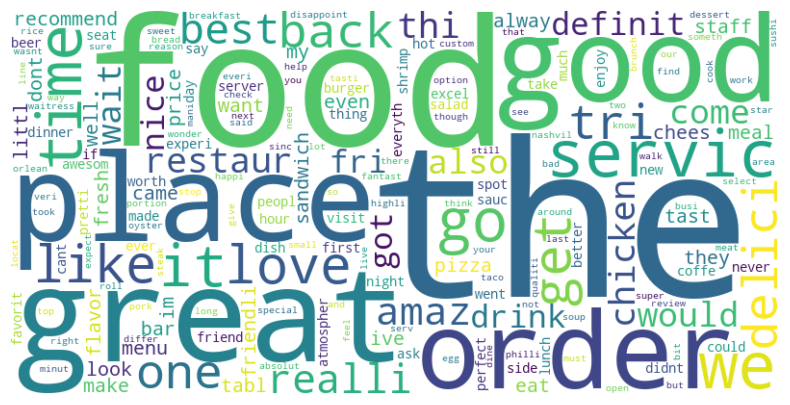

In [25]:
from wordcloud import WordCloud
sums = X_train_counts.sum(axis=0)

# Connecting term and its tfidf frequency
data = []
for col, term in enumerate(feature_names):
    data.append((term, sums[0, col]))

ranking = pd.DataFrame(data, columns=['term', 'rank'])
words = dict(ranking.sort_values('rank', ascending=False).values)

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(words)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_counts, y_train)
# Transform the test data into a matrix of token counts
X_test_counts = tfidfVectorizer.transform(X_test)
# Make predictions on the test data
predictions = lr.predict(X_test_counts)
print(confusion_matrix(y_test, predictions))

[[ 65267   8404]
 [  5316 280687]]


### Logistic Regression

In [74]:
print(classification_report(y_test, predictions, digits=4))

              precision    recall  f1-score   support

         0.0     0.9247    0.8859    0.9049     73671
         1.0     0.9709    0.9814    0.9761    286003

    accuracy                         0.9619    359674
   macro avg     0.9478    0.9337    0.9405    359674
weighted avg     0.9615    0.9619    0.9615    359674



### XGBOOST

In [75]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_counts,y_train)
predxgb = xgb.predict(X_test_counts)
print("Confusion Matrix for XGBoost Classifier:")
print(confusion_matrix(y_test,predxgb))
print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predxgb))

Confusion Matrix for XGBoost Classifier:
[[ 59310  14361]
 [  5218 280785]]
Score:  94.56
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     73671
         1.0       0.95      0.98      0.97    286003

    accuracy                           0.95    359674
   macro avg       0.94      0.89      0.91    359674
weighted avg       0.94      0.95      0.94    359674



### NULL MODEL FOR TF-IDF Vectorizer

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier

vectorizer = TfidfVectorizer()

X_train_transformed = vectorizer.fit_transform(X_train)

# Create a null model that always predicts the most frequent class
null_model = DummyClassifier(strategy='most_frequent')

# Train the model
null_model.fit(X_train_transformed, y_train)

# Transform the test data
X_test_transformed = vectorizer.transform(X_test)

# Test the model
predictions = null_model.predict(X_test_transformed)


In [15]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions,  zero_division=1)

print(report)


              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00     73671
         1.0       0.80      1.00      0.89    286003

    accuracy                           0.80    359674
   macro avg       0.90      0.50      0.44    359674
weighted avg       0.84      0.80      0.70    359674



### Both Logistic (96% accuracy) and XGBoost (95% accuracy) did better than the null model (80% accuracy) for tf-idf vectorizer